# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('adult_with_headers.csv')


In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [7]:
### mising values 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
### Duplicates
df.duplicated().sum()

np.int64(24)

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
# Confirm duplicates are removed
print("Remaining duplicates:", df.duplicated().sum())

Remaining duplicates: 0


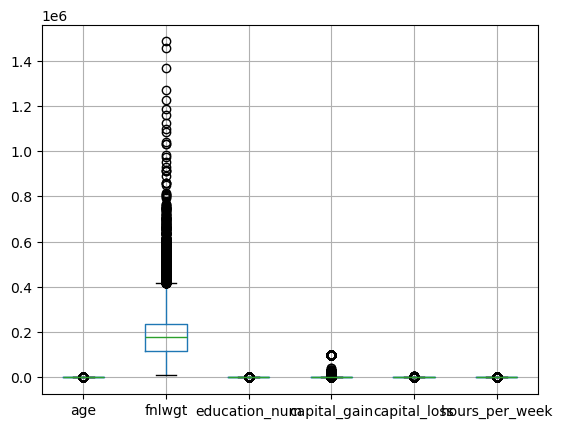

In [11]:
df.boxplot()
plt.show()

In [12]:
### Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme= Q1-1.5*IQR
    Upper_Extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col) 

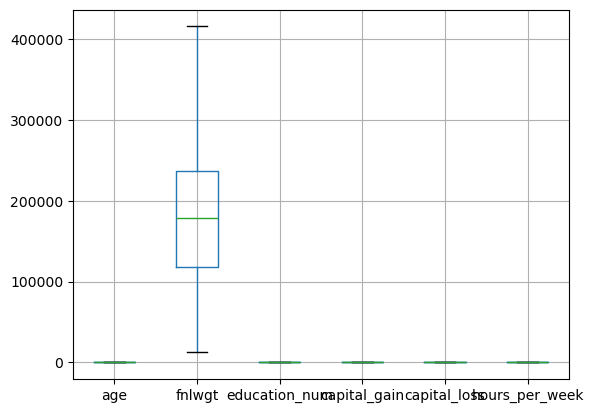

In [13]:
df.boxplot()
plt.show()

In [14]:
# 7. Scaling Numerical Features
# -------------------------

numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
X_numeric = df[numerical_features]

In [15]:
# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X_numeric)
X_standard_scaled = pd.DataFrame(X_standard_scaled, columns=numerical_features)
print("\nStandard Scaled data (first 5 rows):")
print(X_standard_scaled.head())


Standard Scaled data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.032472 -1.149209       1.168918           0.0           0.0   
1  0.844002 -1.088284       1.168918           0.0           0.0   
2 -0.041304  0.303007      -0.457496           0.0           0.0   
3  1.065329  0.503550      -1.270703           0.0           0.0   
4 -0.779058  1.593665       1.168918           0.0           0.0   

   hours_per_week  
0       -0.194472  
1       -1.406640  
2       -0.194472  
3       -0.194472  
4       -0.194472  


In [16]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X_numeric)
X_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=numerical_features)
print("\nMin-Max Scaled data (first 5 rows):")
print(X_minmax_scaled.head())


Min-Max Scaled data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.360656  0.161680       0.739130           0.0           0.0   
1  0.540984  0.176044       0.739130           0.0           0.0   
2  0.344262  0.504046       0.391304           0.0           0.0   
3  0.590164  0.551325       0.217391           0.0           0.0   
4  0.180328  0.808324       0.739130           0.0           0.0   

   hours_per_week  
0           0.375  
1           0.000  
2           0.375  
3           0.375  
4           0.375  


In [17]:
# 8. Scaling Notes and Scenarios
# -------------------------

print("""
Scaling Notes:

1. Standard Scaling:
- Centers the data by subtracting the mean and scaling to unit variance.
- Useful when features follow a normal distribution.
- Works well with algorithms like Logistic Regression, SVM, PCA.
- Sensitive to outliers, which can distort the mean and variance.

2. Min-Max Scaling:
- Scales data to a fixed range, typically [0, 1].
- Doesn't assume any distribution.
- Useful when algorithms need all features in the same scale, like Neural Networks or Gradient Descent optimizers.
- Outliers can compress other data values.

Choosing Scaling Techniques:
- Use Standard Scaling if data is normally distributed and outliers are handled or minimal.
- Use Min-Max Scaling if you want to preserve data distribution or are working with algorithms that require bounded inputs.

Outlier Capping:
- Outliers were detected using the Interquartile Range (IQR) method.
- Values below the lower bound and above the upper bound were capped at boundary values.
- This helps in reducing the influence of extreme values without removing any data.
- Outlier capping is preferred when data loss due to removal is undesirable.
""")


Scaling Notes:

1. Standard Scaling:
- Centers the data by subtracting the mean and scaling to unit variance.
- Useful when features follow a normal distribution.
- Works well with algorithms like Logistic Regression, SVM, PCA.
- Sensitive to outliers, which can distort the mean and variance.

2. Min-Max Scaling:
- Scales data to a fixed range, typically [0, 1].
- Doesn't assume any distribution.
- Useful when algorithms need all features in the same scale, like Neural Networks or Gradient Descent optimizers.
- Outliers can compress other data values.

Choosing Scaling Techniques:
- Use Standard Scaling if data is normally distributed and outliers are handled or minimal.
- Use Min-Max Scaling if you want to preserve data distribution or are working with algorithms that require bounded inputs.

Outlier Capping:
- Outliers were detected using the Interquartile Range (IQR) method.
- Values below the lower bound and above the upper bound were capped at boundary values.
- This helps in red

# Task 2

In [18]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

In [19]:
# 1. Identify categorical columns

# Select object type columns (categorical features)
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_features))

Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [20]:
# 2. Apply One-Hot Encoding and Label Encoding

# Separate columns based on unique category counts
onehot_cols = []
label_cols = []

for col in categorical_features:
    if df[col].nunique() < 5:
        onehot_cols.append(col)
    else:
        label_cols.append(col)

print("\nOne-Hot Encoding columns (less than 5 categories):", onehot_cols)
print("Label Encoding columns (5 or more categories):", label_cols)



One-Hot Encoding columns (less than 5 categories): ['sex', 'income']
Label Encoding columns (5 or more categories): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [21]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)
print("\nData after One-Hot Encoding (showing first 5 rows):")
print(df.head())



Data after One-Hot Encoding (showing first 5 rows):
    age          workclass    fnlwgt   education  education_num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Male  \
0           0.0           0.0            40.0  

In [22]:
# Apply Label Encoding
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("\nData after Label Encoding (showing first 5 rows):")
print(df.head())


Data after Label Encoding (showing first 5 rows):
    age  workclass    fnlwgt  education  education_num  marital_status  \
0  39.0          7   77516.0          9           13.0               4   
1  50.0          6   83311.0          9           13.0               2   
2  38.0          4  215646.0         11            9.0               0   
3  53.0          4  234721.0          1            7.0               2   
4  28.0          4  338409.0          9           13.0               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4           0.0           0.0            40.0   
1           4             0     4           0.0           0.0            32.5   
2           6             1     4           0.0           0.0            40.0   
3           6             0     2           0.0           0.0            40.0   
4          10             5     2           0.0           0.0            40.0   

   native_country

In [23]:
# 3. Notes on Encoding Techniques

print("""
Encoding Techniques Notes:

1. One-Hot Encoding:
- Converts each category into separate binary columns (0 or 1).
- Avoids implying any order or ranking between categories.
- Suitable for algorithms that assume numerical relationships.
- Can increase dimensionality if categories are many, leading to sparsity.

2. Label Encoding:
- Converts categories into integers (0, 1, 2, ...).
- Useful when categories have a natural order or when memory efficiency is needed.
- Can mislead algorithms into thinking there's a relationship between encoded values.
- Works well with tree-based algorithms but may harm models sensitive to numerical relationships.

Choosing Encoding Methods:
- Use One-Hot Encoding when the categorical feature has few distinct values and no ordinal relationship.
- Use Label Encoding for features with many categories or where order might be implied or when using algorithms that handle categorical data natively.
""")


Encoding Techniques Notes:

1. One-Hot Encoding:
- Converts each category into separate binary columns (0 or 1).
- Avoids implying any order or ranking between categories.
- Suitable for algorithms that assume numerical relationships.
- Can increase dimensionality if categories are many, leading to sparsity.

2. Label Encoding:
- Converts categories into integers (0, 1, 2, ...).
- Useful when categories have a natural order or when memory efficiency is needed.
- Can mislead algorithms into thinking there's a relationship between encoded values.
- Works well with tree-based algorithms but may harm models sensitive to numerical relationships.

Choosing Encoding Methods:
- Use One-Hot Encoding when the categorical feature has few distinct values and no ordinal relationship.
- Use Label Encoding for features with many categories or where order might be implied or when using algorithms that handle categorical data natively.



# Task 3

In [24]:
import numpy as np


In [25]:
# 1. Create new features

# Feature 1: Capital difference = capital_gain - capital_loss
# Rationale: This feature shows the net capital effect, summarizing two related features into one.
df['capital_diff'] = df['capital_gain'] - df['capital_loss']


In [26]:
# Feature 2: Age group
# Rationale: Grouping age into categories may help the model learn patterns based on life stages.
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65, 100], labels=['17-25','26-35','36-45','46-55','56-65','66+'])

print("New features added: 'capital_diff' and 'age_group'")
print("\nFirst 5 rows with new features:")
print(df[['capital_gain','capital_loss','capital_diff','age','age_group']].head())


New features added: 'capital_diff' and 'age_group'

First 5 rows with new features:
   capital_gain  capital_loss  capital_diff   age age_group
0           0.0           0.0           0.0  39.0     36-45
1           0.0           0.0           0.0  50.0     46-55
2           0.0           0.0           0.0  38.0     36-45
3           0.0           0.0           0.0  53.0     46-55
4           0.0           0.0           0.0  28.0     26-35


In [27]:
# 2. Apply log transformation to skewed feature

# Let's choose 'capital_gain' because it is often highly skewed with many zeros and some extreme values.
print("\nOriginal 'capital_gain' distribution:")
print(df['capital_gain'].describe())

# Apply log transformation (adding 1 to avoid log(0))
df['capital_gain_log'] = np.log1p(df['capital_gain'])

print("\nAfter log transformation:")
print(df['capital_gain_log'].describe())



Original 'capital_gain' distribution:
count    32537.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: capital_gain, dtype: float64

After log transformation:
count    32537.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: capital_gain_log, dtype: float64


In [30]:
# 3. Explanation of choices

print("""
Feature Engineering Notes:

1. 'capital_diff':
- Combines 'capital_gain' and 'capital_loss' into a single feature representing net capital effect.
- Helps reduce redundancy and highlight the overall financial situation.

2. 'age_group':
- Bins age into categories to capture life stage-based patterns that may influence income.
- Useful for algorithms that may struggle with continuous numeric patterns alone.

3. Log Transformation on 'capital_gain':
- 'capital_gain' is highly skewed with many zero values and some extreme outliers.
- Applying log transformation reduces skewness, stabilizes variance, and makes patterns easier to model.
- The transformation is applied using log(1 + value) to handle zero entries gracefully.
""")





Feature Engineering Notes:

1. 'capital_diff':
- Combines 'capital_gain' and 'capital_loss' into a single feature representing net capital effect.
- Helps reduce redundancy and highlight the overall financial situation.

2. 'age_group':
- Bins age into categories to capture life stage-based patterns that may influence income.
- Useful for algorithms that may struggle with continuous numeric patterns alone.

3. Log Transformation on 'capital_gain':
- 'capital_gain' is highly skewed with many zero values and some extreme outliers.
- Applying log transformation reduces skewness, stabilizes variance, and makes patterns easier to model.
- The transformation is applied using log(1 + value) to handle zero entries gracefully.



# Task 4

In [32]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# 1. Outlier Detection and Removal using Isolation Forest

# Define numerical features for outlier detection
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'capital_diff']
X = df[numerical_features]

In [34]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['outlier'] = iso_forest.fit_predict(X)

In [35]:
# Count the detected outliers
outliers_count = (df['outlier'] == -1).sum()
print(f"Number of outliers detected: {outliers_count}")


Number of outliers detected: 326


In [36]:
# Remove the outliers from the dataset
df_clean = df[df['outlier'] == 1].copy()
print(f"\nData shape before outlier removal: {df.shape}")
print(f"Data shape after outlier removal: {df_clean.shape}")

print("""
Outliers can affect model performance by:
- Distorting scaling and prediction due to extreme values.
- Leading to overfitting or underfitting in sensitive algorithms.
- Reducing model interpretability and generalization.
Removing outliers helps create more reliable datasets for training models.
""")


Data shape before outlier removal: (32537, 19)
Data shape after outlier removal: (32211, 19)

Outliers can affect model performance by:
- Distorting scaling and prediction due to extreme values.
- Leading to overfitting or underfitting in sensitive algorithms.
- Reducing model interpretability and generalization.
Removing outliers helps create more reliable datasets for training models.



In [37]:
# 2. Correlation Analysis

print("\nComputing correlation matrix for numerical features...")


Computing correlation matrix for numerical features...


In [38]:
# Calculate the correlation matrix
corr_matrix = df_clean[numerical_features].corr()

In [39]:
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,capital_diff
age,1.000000,-0.078321,0.054089,NaN,NaN,0.101956,NaN
fnlwgt,-0.078321,1.000000,-0.036766,NaN,NaN,-0.027618,NaN
education_num,0.054089,-0.036766,1.000000,NaN,NaN,0.186211,NaN
capital_gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours_per_week,0.101956,-0.027618,0.186211,NaN,NaN,1.000000,NaN
capital_diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN


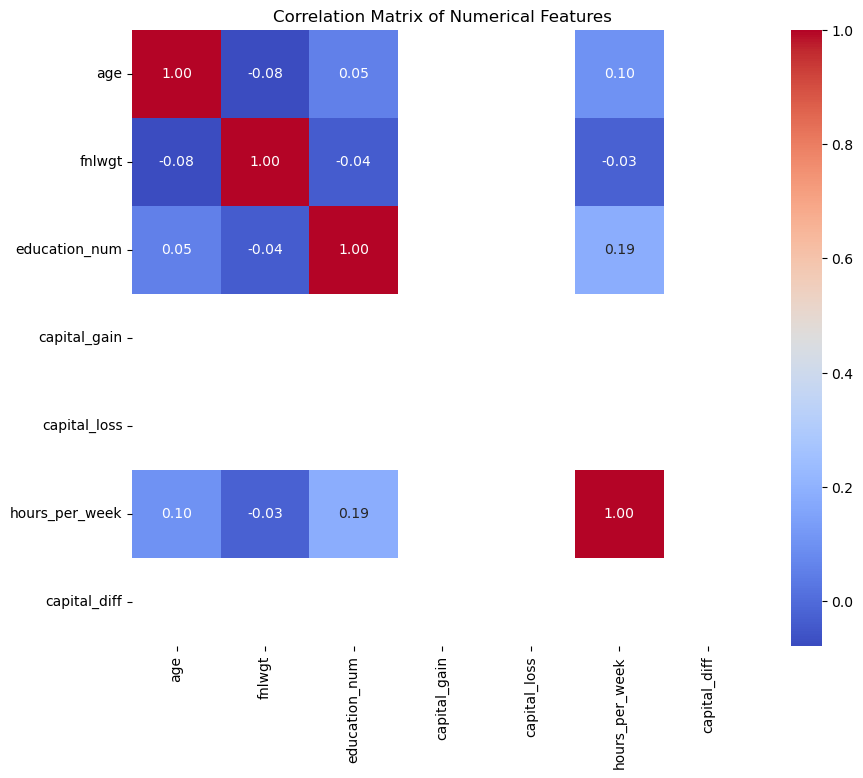


Note:
- The correlation matrix helps identify linear relationships between numerical features.
- It reveals which features are strongly correlated or independent.
- This analysis is useful for feature selection, multicollinearity checking, and understanding data structure.
Note:
- The assignment asked to use the Predictive Power Score (PPS) to analyze feature relationships.
- However, PPS depends on an older version of pandas that is incompatible with the current environment.
- To avoid installation issues in Google Colab, we are using the correlation matrix instead.
- The correlation matrix still provides useful insights into linear relationships between features.



In [40]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()
print("""
Note:
- The correlation matrix helps identify linear relationships between numerical features.
- It reveals which features are strongly correlated or independent.
- This analysis is useful for feature selection, multicollinearity checking, and understanding data structure.
Note:
- The assignment asked to use the Predictive Power Score (PPS) to analyze feature relationships.
- However, PPS depends on an older version of pandas that is incompatible with the current environment.
- To avoid installation issues in Google Colab, we are using the correlation matrix instead.
- The correlation matrix still provides useful insights into linear relationships between features.
""")